In [1]:
import tensorflow as tf
tf.test.gpu_device_name()

'/device:GPU:0'

In [2]:
# module imports
import numpy as np 
import pandas as pd  
import math
import matplotlib.pyplot as plt
import seaborn as sns
import itertools
import random

In [3]:
# model imports
import tensorflow as tf
import keras
# processing imports
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.preprocessing import LabelEncoder,OrdinalEncoder
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2,f_classif
from sklearn.  feature_selection import RFECV
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from scipy.stats import zscore

In [4]:
#Mounting google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
# Reading datasets
test_df = pd.read_csv('/content/drive/MyDrive/NSLKDD_Arpita/NSL_KDD-master/KDDTest+.csv',header=None)
train_df = pd.read_csv('/content/drive/MyDrive/NSLKDD_Arpita/NSL_KDD-master/KDDTrain+.csv',header=None)
attackdf = pd.read_excel('/content/drive/MyDrive/NSLKDD_Arpita/NSL_KDD-master/Attack Types.xlsx',header=None)

In [6]:
label_dict = {}
for row in attackdf.to_numpy():
  label_dict[row[0]] = row[1]

In [7]:
print(label_dict)

{'back': 'dos', 'buffer_overflow': 'u2r', 'ftp_write': 'r2l', 'guess_passwd': 'r2l', 'imap': 'r2l', 'ipsweep': 'probe', 'land': 'dos', 'loadmodule': 'u2r', 'multihop': 'r2l', 'neptune': 'dos', 'nmap': 'probe', 'perl': 'u2r', 'phf': 'r2l', 'pod': 'dos', 'portsweep': 'probe', 'rootkit': 'u2r', 'satan': 'probe', 'smurf': 'dos', 'spy': 'r2l', 'teardrop': 'dos', 'warezclient': 'r2l', 'warezmaster': 'r2l', 'normal': 'normal', 'unknown': 'unknown', 'apache2': 'dos', 'mailbomb': 'dos', 'processtable': 'dos', 'udpstorm': 'dos', 'named': 'r2l', 'sendmail': 'r2l', 'snmpgetattack': 'r2l', 'snmpguess': 'r2l', 'worm': 'r2l', 'xsnoop': 'r2l', 'xlock': 'r2l', 'httptunnel': 'u2r', 'xterm': 'u2r', 'ps': 'u2r', 'sqlattack': 'u2r', 'saint': 'probe', 'mscan': 'probe'}


In [8]:
#column name
columns = ['duration'
,'protocol_type'
,'service'
,'flag'
,'src_bytes'
,'dst_bytes'
,'land'
,'wrong_fragment'
,'urgent'
,'hot'
,'num_failed_logins'
,'logged_in'
,'num_compromised'
,'root_shell'
,'su_attempted'
,'num_root'
,'num_file_creations'
,'num_shells'
,'num_access_files'
,'num_outbound_cmds'
,'is_host_login'
,'is_guest_login'
,'count'
,'srv_count'
,'serror_rate'
,'srv_serror_rate'
,'rerror_rate'
,'srv_rerror_rate'
,'same_srv_rate'
,'diff_srv_rate'
,'srv_diff_host_rate'
,'dst_host_count'
,'dst_host_srv_count'
,'dst_host_same_srv_rate'
,'dst_host_diff_srv_rate'
,'dst_host_same_src_port_rate'
,'dst_host_srv_diff_host_rate'
,'dst_host_serror_rate'
,'dst_host_srv_serror_rate'
,'dst_host_rerror_rate'
,'dst_host_srv_rerror_rate'
,'attack'
,'level']

In [9]:
train_df.columns = columns
test_df.columns = columns

In [10]:
trainsamples = train_df.shape[0]
testsamples = test_df.shape[0]
print("Training samples: ",trainsamples)
print("Testing samples: ",testsamples)

Training samples:  125973
Testing samples:  22543


In [11]:
train_df = pd.concat([train_df,test_df],axis = 0)
train_df.shape

(148516, 43)

In [12]:
train_df.reset_index(drop=True,inplace=True)
train_df.shape

(148516, 43)

In [13]:
print(train_df.shape)
train_df.head()

(148516, 43)


,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack,level
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal,20
1,0,udp,other,SF,146,0,0,0,0,0,...,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal,15
2,0,tcp,private,S0,0,0,0,0,0,0,...,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune,19
3,0,tcp,http,SF,232,8153,0,0,0,0,...,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal,21
4,0,tcp,http,SF,199,420,0,0,0,0,...,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal,21


In [14]:
# Map attack labels
train_df['attack'] = train_df['attack'].map(lambda x: label_dict[x])

In [15]:
attack_s = train_df.iloc[:trainsamples,:]['attack']

In [16]:
attack_s

0         normal
1         normal
2            dos
3         normal
4         normal
           ...  
125968       dos
125969    normal
125970    normal
125971       dos
125972    normal
Name: attack, Length: 125973, dtype: object

In [17]:
# dataset statistics
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148516 entries, 0 to 148515
Data columns (total 43 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   duration                     148516 non-null  int64  
 1   protocol_type                148516 non-null  object 
 2   service                      148516 non-null  object 
 3   flag                         148516 non-null  object 
 4   src_bytes                    148516 non-null  int64  
 5   dst_bytes                    148516 non-null  int64  
 6   land                         148516 non-null  int64  
 7   wrong_fragment               148516 non-null  int64  
 8   urgent                       148516 non-null  int64  
 9   hot                          148516 non-null  int64  
 10  num_failed_logins            148516 non-null  int64  
 11  logged_in                    148516 non-null  int64  
 12  num_compromised              148516 non-null  int64  
 13 

In [18]:
# count of Null values
train_df.isnull().sum()

duration                       0
protocol_type                  0
service                        0
flag                           0
src_bytes                      0
dst_bytes                      0
land                           0
wrong_fragment                 0
urgent                         0
hot                            0
num_failed_logins              0
logged_in                      0
num_compromised                0
root_shell                     0
su_attempted                   0
num_root                       0
num_file_creations             0
num_shells                     0
num_access_files               0
num_outbound_cmds              0
is_host_login                  0
is_guest_login                 0
count                          0
srv_count                      0
serror_rate                    0
srv_serror_rate                0
rerror_rate                    0
srv_rerror_rate                0
same_srv_rate                  0
diff_srv_rate                  0
srv_diff_h

In [19]:
# All attack labels
train_df['attack'].unique().tolist()

['normal', 'dos', 'r2l', 'probe', 'u2r']

In [20]:
# All protocl labels
train_df['protocol_type'].unique().tolist()

['tcp', 'udp', 'icmp']

In [21]:
# All flag labels
train_df['flag'].unique().tolist()

['SF', 'S0', 'REJ', 'RSTR', 'SH', 'RSTO', 'S1', 'RSTOS0', 'S3', 'S2', 'OTH']

In [22]:
# All service labels
train_df['service'].unique().tolist()

['ftp_data',
 'other',
 'private',
 'http',
 'remote_job',
 'name',
 'netbios_ns',
 'eco_i',
 'mtp',
 'telnet',
 'finger',
 'domain_u',
 'supdup',
 'uucp_path',
 'Z39_50',
 'smtp',
 'csnet_ns',
 'uucp',
 'netbios_dgm',
 'urp_i',
 'auth',
 'domain',
 'ftp',
 'bgp',
 'ldap',
 'ecr_i',
 'gopher',
 'vmnet',
 'systat',
 'http_443',
 'efs',
 'whois',
 'imap4',
 'iso_tsap',
 'echo',
 'klogin',
 'link',
 'sunrpc',
 'login',
 'kshell',
 'sql_net',
 'time',
 'hostnames',
 'exec',
 'ntp_u',
 'discard',
 'nntp',
 'courier',
 'ctf',
 'ssh',
 'daytime',
 'shell',
 'netstat',
 'pop_3',
 'nnsp',
 'IRC',
 'pop_2',
 'printer',
 'tim_i',
 'pm_dump',
 'red_i',
 'netbios_ssn',
 'rje',
 'X11',
 'urh_i',
 'http_8001',
 'aol',
 'http_2784',
 'tftp_u',
 'harvest']

In [23]:
# count of attack labels
train_df["attack"].value_counts()

normal    77053
dos       53385
probe     14077
r2l        3749
u2r         252
Name: attack, dtype: int64

In [24]:
#Label encoded Dataset

df = train_df.copy()
tolabelencode = ['protocol_type','service', 'flag']
lc = LabelEncoder()
for col in tolabelencode:
  df[col] = lc.fit_transform(df[col])

#one hot encode labels
df = pd.get_dummies(df)
print(df.shape)
df.head()

(148516, 47)


,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,level,attack_dos,attack_normal,attack_probe,attack_r2l,attack_u2r
0,0,1,20,9,491,0,0,0,0,0,...,0.00,0.00,0.05,0.00,20,0,1,0,0,0
1,0,2,44,9,146,0,0,0,0,0,...,0.00,0.00,0.00,0.00,15,0,1,0,0,0
2,0,1,49,5,0,0,0,0,0,0,...,1.00,1.00,0.00,0.00,19,1,0,0,0,0
3,0,1,24,9,232,8153,0,0,0,0,...,0.03,0.01,0.00,0.01,21,0,1,0,0,0
4,0,1,24,9,199,420,0,0,0,0,...,0.00,0.00,0.00,0.00,21,0,1,0,0,0


In [25]:
labels = attack_s.unique()
NUM_LABELS = len(labels)
print(NUM_LABELS)

5


In [26]:
# Scaling data / Min-Max Scaling

X = df.iloc[:,:df.shape[1]-NUM_LABELS]
Y = df.iloc[:,-NUM_LABELS:].to_numpy().astype(np.float32)

sc = MinMaxScaler()
X = sc.fit_transform(X)
X = np.float32(X)

In [27]:
print(X.shape)
print(Y.shape)

(148516, 42)
(148516, 5)


In [28]:
data = np.concatenate([X,Y],axis=1)
df = pd.DataFrame(data=data,columns = df.columns)

In [29]:
print(df.shape)
df.head()

(148516, 47)


,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,level,attack_dos,attack_normal,attack_probe,attack_r2l,attack_u2r
0,0.0,0.5,0.289855,0.9,3.558064e-07,0.000000e+00,0.0,0.0,0.0,0.0,...,0.00,0.00,0.05,0.00,0.952381,0.0,1.0,0.0,0.0,0.0
1,0.0,1.0,0.637681,0.9,1.057999e-07,0.000000e+00,0.0,0.0,0.0,0.0,...,0.00,0.00,0.00,0.00,0.714286,0.0,1.0,0.0,0.0,0.0
2,0.0,0.5,0.710145,0.5,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.0,...,1.00,1.00,0.00,0.00,0.904762,1.0,0.0,0.0,0.0,0.0
3,0.0,0.5,0.347826,0.9,1.681203e-07,6.223961e-06,0.0,0.0,0.0,0.0,...,0.03,0.01,0.00,0.01,1.000000,0.0,1.0,0.0,0.0,0.0
4,0.0,0.5,0.347826,0.9,1.442067e-07,3.206260e-07,0.0,0.0,0.0,0.0,...,0.00,0.00,0.00,0.00,1.000000,0.0,1.0,0.0,0.0,0.0


In [30]:
#Split train and test dataset
print("Number of testing samples: ",test_df.shape[0])
test_df = df.iloc[-test_df.shape[0]:,:]
train_df = df.drop(index = df.iloc[-test_df.shape[0]:,:].index,axis = 0)

Number of testing samples:  22543


In [31]:
test_df.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,level,attack_dos,attack_normal,attack_probe,attack_r2l,attack_u2r
125973,0.000000,0.5,0.710145,0.1,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.0,...,0.0,0.0,1.00,1.00,1.000000,1.0,0.0,0.0,0.0,0.0
125974,0.000000,0.5,0.710145,0.1,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.0,...,0.0,0.0,1.00,1.00,1.000000,1.0,0.0,0.0,0.0,0.0
125975,0.000035,0.5,0.289855,0.9,9.408217e-06,0.000000e+00,0.0,0.0,0.0,0.0,...,0.0,0.0,0.00,0.00,1.000000,0.0,1.0,0.0,0.0,0.0
125976,0.000000,0.0,0.202899,0.9,1.449313e-08,0.000000e+00,0.0,0.0,0.0,0.0,...,0.0,0.0,0.00,0.00,0.714286,0.0,0.0,1.0,0.0,0.0
125977,0.000017,0.5,0.869565,0.2,0.000000e+00,1.145093e-08,0.0,0.0,0.0,0.0,...,0.0,0.0,0.83,0.71,0.523810,0.0,0.0,1.0,0.0,0.0


In [32]:
test_df.reset_index(inplace = True,drop=True)
test_df.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,level,attack_dos,attack_normal,attack_probe,attack_r2l,attack_u2r
0,0.000000,0.5,0.710145,0.1,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.0,...,0.0,0.0,1.00,1.00,1.000000,1.0,0.0,0.0,0.0,0.0
1,0.000000,0.5,0.710145,0.1,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.0,...,0.0,0.0,1.00,1.00,1.000000,1.0,0.0,0.0,0.0,0.0
2,0.000035,0.5,0.289855,0.9,9.408217e-06,0.000000e+00,0.0,0.0,0.0,0.0,...,0.0,0.0,0.00,0.00,1.000000,0.0,1.0,0.0,0.0,0.0
3,0.000000,0.0,0.202899,0.9,1.449313e-08,0.000000e+00,0.0,0.0,0.0,0.0,...,0.0,0.0,0.00,0.00,0.714286,0.0,0.0,1.0,0.0,0.0
4,0.000017,0.5,0.869565,0.2,0.000000e+00,1.145093e-08,0.0,0.0,0.0,0.0,...,0.0,0.0,0.83,0.71,0.523810,0.0,0.0,1.0,0.0,0.0


In [33]:
train_df.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,level,attack_dos,attack_normal,attack_probe,attack_r2l,attack_u2r
0,0.0,0.5,0.289855,0.9,3.558064e-07,0.000000e+00,0.0,0.0,0.0,0.0,...,0.00,0.00,0.05,0.00,0.952381,0.0,1.0,0.0,0.0,0.0
1,0.0,1.0,0.637681,0.9,1.057999e-07,0.000000e+00,0.0,0.0,0.0,0.0,...,0.00,0.00,0.00,0.00,0.714286,0.0,1.0,0.0,0.0,0.0
2,0.0,0.5,0.710145,0.5,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.0,...,1.00,1.00,0.00,0.00,0.904762,1.0,0.0,0.0,0.0,0.0
3,0.0,0.5,0.347826,0.9,1.681203e-07,6.223961e-06,0.0,0.0,0.0,0.0,...,0.03,0.01,0.00,0.01,1.000000,0.0,1.0,0.0,0.0,0.0
4,0.0,0.5,0.347826,0.9,1.442067e-07,3.206260e-07,0.0,0.0,0.0,0.0,...,0.00,0.00,0.00,0.00,1.000000,0.0,1.0,0.0,0.0,0.0


In [34]:
#train_df.to_csv('/content/drive/MyDrive/NSLKDD_Arpita/Downloaded_Files/preprocessed_train_dataset.csv',index = False)

################################################################################


In [35]:
print("Training samples: ",train_df.shape[0])
print("Testing samples: ",test_df.shape[0])

Training samples:  125973
Testing samples:  22543


In [36]:
print(train_df.shape, test_df.shape)

(125973, 47) (22543, 47)


In [37]:
def datasetbalancingUtility():
  attacks = attack_s.value_counts()
  max_count = attacks[0]
  major_class = []
  minor_class = []
  for name,count in zip(attacks.index,attacks):
    if(max_count - count >= max_count/2):
      minor_class.append([name,count])
    else:
      major_class.append([name,count])
  return major_class,minor_class

In [38]:
major_class,minor_class = datasetbalancingUtility()
print(major_class)

[['normal', 67343], ['dos', 45927]]


In [39]:
def generateTrainingDataset():
  res = []
  majclass = [x[0] for x in major_class]
  for label in majclass:
    index = attack_s[attack_s == label].index.to_list()
    res.extend(index)
  res.sort()
  return res

In [40]:
indices = generateTrainingDataset()

In [41]:
mdf = train_df.drop(index = indices)
mdf.reset_index(inplace = True,drop = True)

In [42]:
print(mdf.shape)
mdf.head()

(12703, 47)


,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,level,attack_dos,attack_normal,attack_probe,attack_r2l,attack_u2r
0,0.0,0.5,0.289855,0.9,2.420353e-07,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.00,0.0,0.714286,0.0,0.0,0.0,1.0,0.0
1,0.0,0.0,0.202899,0.9,1.304382e-08,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.00,0.0,0.857143,0.0,0.0,1.0,0.0,0.0
2,0.0,0.0,0.202899,0.9,5.797253e-09,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.00,0.0,0.809524,0.0,0.0,1.0,0.0,0.0
3,0.0,0.5,0.710145,0.1,0.000000e+00,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.29,1.0,0.952381,0.0,0.0,1.0,0.0,0.0
4,0.0,0.5,0.289855,0.9,2.420353e-07,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.00,0.0,0.571429,0.0,0.0,0.0,1.0,0.0


In [43]:
X = mdf.iloc[:,:mdf.shape[1]-NUM_LABELS]
Y = mdf.iloc[:,-NUM_LABELS:].to_numpy().astype(np.float32)

In [44]:
print(X.shape)
print(Y.shape)

(12703, 42)
(12703, 5)


In [45]:
BATCH_SIZE = 128
dataset = tf.data.Dataset.from_tensor_slices((X, Y))
dataset = dataset.shuffle(buffer_size=512).batch(BATCH_SIZE)

# Conditional WGAN-GP

In [46]:
# Importing Libraries

import tensorflow as tf

from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam

from matplotlib import pyplot as plt
import numpy as np

import os

In [47]:
# parameters
LAYERS_DIM = 128
OUTPUT_DIM = X.shape[1]
Z_NOISE_DIM = 32

In [48]:
def Generator():
    model = Sequential(name="generator")
    model.add(layers.Input(shape=(Z_NOISE_DIM + NUM_LABELS,)))
    model.add(layers.Dense(128,activation='relu'))
    model.add(layers.Dense(64,activation='relu'))
    model.add(layers.Dense(OUTPUT_DIM,activation='sigmoid'))
    return model

def Discriminator():
    model = Sequential(name="critic")
    model.add(layers.Input(shape=(OUTPUT_DIM + NUM_LABELS,)))
    model.add(layers.Dense(128,activation='relu'))
    model.add(layers.Dense(64,activation='relu'))
    model.add(layers.Dense(1,activation='linear'))
    return model

In [49]:
generator = Generator()
generator.summary()

Model: "generator"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               4864      
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dense_2 (Dense)             (None, 42)                2730      
                                                                 
Total params: 15,850
Trainable params: 15,850
Non-trainable params: 0
_________________________________________________________________


In [50]:
critic = Discriminator()
critic.summary()

Model: "critic"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 128)               6144      
                                                                 
 dense_4 (Dense)             (None, 64)                8256      
                                                                 
 dense_5 (Dense)             (None, 1)                 65        
                                                                 
Total params: 14,465
Trainable params: 14,465
Non-trainable params: 0
_________________________________________________________________


In [51]:
class WGAN_GP(keras.Model):
    def __init__(self, 
                 critic, 
                 generator, 
                 latent_dim, 
                 critic_extra_steps, 
                 gp_weight=10.0): # UPDATE for WGAN-GP: gradient penalty weight
        super().__init__()
        self.critic = critic
        self.generator = generator
        self.latent_dim = latent_dim
        self.c_extra_steps = critic_extra_steps
        self.gp_weight = gp_weight # WGAN-GP
        self.d_loss_metric = keras.metrics.Mean(name="d_loss")
        self.g_loss_metric = keras.metrics.Mean(name="g_loss")
        self.d_lossArray = []
        self.g_lossArray = []


    def compile(self, d_optimizer, g_optimizer, d_loss_fn, g_loss_fn):
        super(WGAN_GP, self).compile()
        self.d_optimizer = d_optimizer
        self.g_optimizer = g_optimizer
        self.d_loss_fn = d_loss_fn
        self.g_loss_fn = g_loss_fn

    @property
    def metrics(self):
        return [self.d_loss_metric, self.g_loss_metric]

    # UPDATE for WGAN-GP: use gradient penalty instead of weight clipping
    def gradient_penalty(self, batch_size, real_images, fake_images):
        """ Calculates the gradient penalty.

        Gradient penalty is calculated on an interpolated image
        and added to the discriminator loss.
        """
        alpha = tf.random.normal([batch_size, 1], 0.0, 1.0)
        diff = fake_images - real_images
        # 1. Create the interpolated image
        interpolated = real_images + alpha * diff

        with tf.GradientTape() as gp_tape:
            gp_tape.watch(interpolated)
            # 2. Get the Critic's output for the interpolated image
            pred = self.critic(interpolated, training=True)

        # 3. Calculate the gradients w.r.t to the interpolated image
        grads = gp_tape.gradient(pred, [interpolated])[0]
        # 4. Calculate the norm of the gradients.
        norm = tf.sqrt(tf.reduce_sum(tf.square(grads), axis=[1]))
        # 5. Calculate gradient penalty
        gradient_penalty = tf.reduce_mean((norm - 1.0) ** 2)
        return gradient_penalty

    def train_step(self, data):

        real_packet, one_hot_labels = data

        batch_size = tf.shape(real_packet)[0]
        noise = tf.random.normal(shape=(batch_size, self.latent_dim))

        real_packet = tf.concat([real_packet,one_hot_labels],axis=1)
        noise_sample = tf.concat([noise,one_hot_labels],axis=1)

        # Train the critic more often than the generator by 5 times (self.c_extra_steps) 
        for i in range(self.c_extra_steps):
            # Step 1. Train the critic with both real images and fake images
            with tf.GradientTape() as tape:
                pred_real = self.critic(real_packet, training=True)
                fake_packet = self.generator(noise_sample, training=True)
                fake_packet = tf.concat([fake_packet,one_hot_labels],axis=1)
                pred_fake = self.critic(fake_packet, training=True)
                # UPDATE for WGAN-GP: Calculate the gradient penalty
                gp = self.gradient_penalty(batch_size, real_packet, fake_packet)
                # UPDATE for WGAN-GP: Add gradient penalty to the original critic loss 
                d_loss = self.d_loss_fn(pred_real, pred_fake) + gp * self.gp_weight 
            # Compute critic gradients
            grads = tape.gradient(d_loss, self.critic.trainable_variables)
            # Update critic weights
            self.d_optimizer.apply_gradients(zip(grads, self.critic.trainable_variables))

        # Step 2. Train the generator (do not update weights of the critic)
        misleading_labels = tf.ones((batch_size, 1)) # G wants D to think the fake images are real (label as 1)

        with tf.GradientTape() as tape:
            fake_packet = self.generator(noise_sample, training=True)
            fake_packet = tf.concat([fake_packet,one_hot_labels],axis=1)
            pred_fake = self.critic(fake_packet, training=True)
            g_loss = self.g_loss_fn(pred_fake)
        # Compute generator gradients
        grads = tape.gradient(g_loss, self.generator.trainable_variables)
        # Update generator wieghts
        self.g_optimizer.apply_gradients(zip(grads, self.generator.trainable_variables))

        self.d_loss_metric.update_state(d_loss)
        self.g_loss_metric.update_state(g_loss)
 
        return {"d_loss": self.d_loss_metric.result(), "g_loss": self.g_loss_metric.result()}

In [52]:
class GANMonitor(keras.callbacks.Callback):
    def on_train_end(self, logs=None):
        self.model.generator.save('/content/drive/MyDrive/NSLKDD_Arpita/Downloaded_Files/final_model_generator.h5')

    def on_epoch_end(self, epoch, logs=None):
        self.model.d_lossArray.append(self.model.d_loss_metric.result().numpy())
        self.model.g_lossArray.append(self.model.g_loss_metric.result().numpy())
        if epoch % 8 == 0:
          self.model.generator.save(f'/content/drive/MyDrive/NSLKDD_Arpita/Downloaded_Files/generator_{epoch}.h5')

In [53]:
wgan_gp = WGAN_GP(critic=critic, 
              generator=generator, 
              latent_dim=Z_NOISE_DIM,
              critic_extra_steps=5) 

In [54]:
# Wasserstein loss for the critic
def d_wasserstein_loss(pred_real, pred_fake):
    real_loss = tf.reduce_mean(pred_real)
    fake_loss = tf.reduce_mean(pred_fake)
    return fake_loss - real_loss

# Wasserstein loss for the generator
def g_wasserstein_loss(pred_fake):
    return -tf.reduce_mean(pred_fake)

In [55]:
LR = 0.0002 # WGAN-GP paper recommends lr of 0.0002
d_optimizer = keras.optimizers.Adam(learning_rate=LR, beta_1=0.5, beta_2=0.9) # UPDATE for WGAN-GP: use Adam instead of RMSProp
g_optimizer = keras.optimizers.Adam(learning_rate=LR, beta_1=0.5, beta_2=0.9) # UPDATE for WGAN-GP: use Adam instead of RMSProp

In [56]:
wgan_gp.compile(
    d_optimizer=d_optimizer,
    g_optimizer=g_optimizer,  
    d_loss_fn = d_wasserstein_loss,
    g_loss_fn = g_wasserstein_loss
)

In [57]:
NUM_EPOCHS = 256 # number of epochs
wgan_gp.fit(dataset, epochs=NUM_EPOCHS, callbacks=[GANMonitor()])

Epoch 1/256
 98/100 [============================>.] - ETA: 0s - d_loss: -2.5112 - g_loss: 2.0071


100/100 [==============================] - 7s 10ms/step - d_loss: -2.5095 - g_loss: 1.9986
Epoch 2/256
100/100 [==============================] - 1s 10ms/step - d_loss: -1.8800 - g_loss: 0.6987
Epoch 3/256
100/100 [==============================] - 1s 10ms/step - d_loss: -1.3088 - g_loss: -0.0496
Epoch 4/256
100/100 [==============================] - 1s 10ms/step - d_loss: -0.9707 - g_loss: -0.3094
Epoch 5/256
100/100 [==============================] - 1s 10ms/step - d_loss: -0.7326 - g_loss: -0.3144
Epoch 6/256
100/100 [==============================] - 1s 10ms/step - d_loss: -0.6266 - g_loss: -0.1979
Epoch 7/256
100/100 [==============================] - 1s 12ms/step - d_loss: -0.5874 - g_loss: -0.1471
Epoch 8/256
100/100 [==============================] - 2s 16ms/step - d_loss: -0.5566 - g_loss: -0.1408
Epoch 9/256
 99/100 [============================>.] - ETA: 0s - d_loss: -0.5310 - g_loss: -0.16


100/100 [==============================] - 2s 17ms/step - d_loss: -0.5330 - g_loss: -0.1640
Epoch 10/256
100/100 [==============================] - 1s 10ms/step - d_loss: -0.5165 - g_loss: -0.1414
Epoch 11/256
100/100 [==============================] - 1s 10ms/step - d_loss: -0.4954 - g_loss: -0.0957
Epoch 12/256
100/100 [==============================] - 1s 10ms/step - d_loss: -0.4850 - g_loss: -0.0962
Epoch 13/256
100/100 [==============================] - 1s 10ms/step - d_loss: -0.4732 - g_loss: -0.0419
Epoch 14/256
100/100 [==============================] - 1s 10ms/step - d_loss: -0.4564 - g_loss: -0.0622
Epoch 15/256
100/100 [==============================] - 1s 10ms/step - d_loss: -0.4480 - g_loss: -0.0513
Epoch 16/256
100/100 [==============================] - 1s 10ms/step - d_loss: -0.4369 - g_loss: -0.0249
Epoch 17/256
 98/100 [============================>.] - ETA: 0s - d_loss: -0.4222 - g_


100/100 [==============================] - 1s 10ms/step - d_loss: -0.4236 - g_loss: -0.0076
Epoch 18/256
100/100 [==============================] - 1s 10ms/step - d_loss: -0.4138 - g_loss: 0.0398
Epoch 19/256
100/100 [==============================] - 1s 10ms/step - d_loss: -0.4005 - g_loss: 0.0580
Epoch 20/256
100/100 [==============================] - 1s 10ms/step - d_loss: -0.3945 - g_loss: 0.0723
Epoch 21/256
100/100 [==============================] - 1s 10ms/step - d_loss: -0.3768 - g_loss: 0.0920
Epoch 22/256
100/100 [==============================] - 1s 10ms/step - d_loss: -0.3653 - g_loss: 0.1138
Epoch 23/256
100/100 [==============================] - 1s 10ms/step - d_loss: -0.3552 - g_loss: 0.0878
Epoch 24/256
100/100 [==============================] - 1s 14ms/step - d_loss: -0.3454 - g_loss: 0.0639
Epoch 25/256
 99/100 [============================>.] - ETA: 0s - d_loss: -0.3400 - g_loss: 0


100/100 [==============================] - 2s 21ms/step - d_loss: -0.3409 - g_loss: 0.0899
Epoch 26/256
100/100 [==============================] - 2s 18ms/step - d_loss: -0.3330 - g_loss: 0.0772
Epoch 27/256
100/100 [==============================] - 2s 17ms/step - d_loss: -0.3247 - g_loss: 0.0130
Epoch 28/256
100/100 [==============================] - 1s 13ms/step - d_loss: -0.3126 - g_loss: -0.0240
Epoch 29/256
100/100 [==============================] - 2s 18ms/step - d_loss: -0.3098 - g_loss: -0.0118
Epoch 30/256
100/100 [==============================] - 1s 14ms/step - d_loss: -0.2993 - g_loss: -0.0278
Epoch 31/256
100/100 [==============================] - 1s 10ms/step - d_loss: -0.2925 - g_loss: -0.0401
Epoch 32/256
100/100 [==============================] - 1s 10ms/step - d_loss: -0.2910 - g_loss: -0.0736
Epoch 33/256
 95/100 [===========================>..] - ETA: 0s - d_loss: -0.2851 - g_loss


100/100 [==============================] - 1s 10ms/step - d_loss: -0.2866 - g_loss: -0.0550
Epoch 34/256
100/100 [==============================] - 1s 10ms/step - d_loss: -0.2820 - g_loss: -0.0935
Epoch 35/256
100/100 [==============================] - 1s 10ms/step - d_loss: -0.2762 - g_loss: -0.0999
Epoch 36/256
100/100 [==============================] - 1s 10ms/step - d_loss: -0.2763 - g_loss: -0.0896
Epoch 37/256
100/100 [==============================] - 1s 10ms/step - d_loss: -0.2752 - g_loss: -0.0734
Epoch 38/256
100/100 [==============================] - 1s 10ms/step - d_loss: -0.2712 - g_loss: -0.0938
Epoch 39/256
100/100 [==============================] - 1s 10ms/step - d_loss: -0.2659 - g_loss: -0.0619
Epoch 40/256
100/100 [==============================] - 1s 10ms/step - d_loss: -0.2639 - g_loss: -0.0579
Epoch 41/256
 98/100 [============================>.] - ETA: 0s - d_loss: -0.2586 - g_


100/100 [==============================] - 1s 10ms/step - d_loss: -0.2590 - g_loss: -0.1008
Epoch 42/256
100/100 [==============================] - 1s 10ms/step - d_loss: -0.2600 - g_loss: -0.0574
Epoch 43/256
100/100 [==============================] - 1s 10ms/step - d_loss: -0.2580 - g_loss: -0.0948
Epoch 44/256
100/100 [==============================] - 1s 10ms/step - d_loss: -0.2466 - g_loss: -0.0941
Epoch 45/256
100/100 [==============================] - 1s 10ms/step - d_loss: -0.2503 - g_loss: -0.0830
Epoch 46/256
100/100 [==============================] - 1s 10ms/step - d_loss: -0.2448 - g_loss: -0.0869
Epoch 47/256
100/100 [==============================] - 1s 10ms/step - d_loss: -0.2455 - g_loss: -0.0845
Epoch 48/256
100/100 [==============================] - 1s 10ms/step - d_loss: -0.2443 - g_loss: -0.0848
Epoch 49/256
100/100 [==============================] - ETA: 0s - d_loss: -0.2447 - g_


100/100 [==============================] - 1s 10ms/step - d_loss: -0.2447 - g_loss: -0.0809
Epoch 50/256
100/100 [==============================] - 1s 10ms/step - d_loss: -0.2397 - g_loss: -0.0747
Epoch 51/256
100/100 [==============================] - 2s 17ms/step - d_loss: -0.2415 - g_loss: -0.0385
Epoch 52/256
100/100 [==============================] - 1s 14ms/step - d_loss: -0.2345 - g_loss: -0.0897
Epoch 53/256
100/100 [==============================] - 1s 11ms/step - d_loss: -0.2355 - g_loss: -0.0453
Epoch 54/256
100/100 [==============================] - 1s 10ms/step - d_loss: -0.2332 - g_loss: -0.0710
Epoch 55/256
100/100 [==============================] - 1s 10ms/step - d_loss: -0.2309 - g_loss: -0.0284
Epoch 56/256
100/100 [==============================] - 1s 10ms/step - d_loss: -0.2288 - g_loss: -0.0792
Epoch 57/256
 98/100 [============================>.] - ETA: 0s - d_loss: -0.2268 - g_


100/100 [==============================] - 1s 10ms/step - d_loss: -0.2280 - g_loss: -0.0718
Epoch 58/256
100/100 [==============================] - 1s 11ms/step - d_loss: -0.2213 - g_loss: -0.0889
Epoch 59/256
100/100 [==============================] - 1s 11ms/step - d_loss: -0.2215 - g_loss: -0.0946
Epoch 60/256
100/100 [==============================] - 2s 18ms/step - d_loss: -0.2207 - g_loss: -0.0740
Epoch 61/256
100/100 [==============================] - 2s 18ms/step - d_loss: -0.2177 - g_loss: -0.0611
Epoch 62/256
100/100 [==============================] - 1s 10ms/step - d_loss: -0.2178 - g_loss: -0.0800
Epoch 63/256
100/100 [==============================] - 1s 10ms/step - d_loss: -0.2122 - g_loss: -0.1107
Epoch 64/256
100/100 [==============================] - 1s 10ms/step - d_loss: -0.2147 - g_loss: -0.0629
Epoch 65/256
 99/100 [============================>.] - ETA: 0s - d_loss: -0.2109 - g_


100/100 [==============================] - 1s 10ms/step - d_loss: -0.2131 - g_loss: -0.0695
Epoch 66/256
100/100 [==============================] - 2s 16ms/step - d_loss: -0.2114 - g_loss: -0.0805
Epoch 67/256
100/100 [==============================] - 1s 11ms/step - d_loss: -0.2121 - g_loss: -0.0869
Epoch 68/256
100/100 [==============================] - 1s 10ms/step - d_loss: -0.2088 - g_loss: -0.0528
Epoch 69/256
100/100 [==============================] - 1s 10ms/step - d_loss: -0.2128 - g_loss: -0.0604
Epoch 70/256
100/100 [==============================] - 1s 10ms/step - d_loss: -0.2085 - g_loss: -0.1112
Epoch 71/256
100/100 [==============================] - 1s 10ms/step - d_loss: -0.2099 - g_loss: -0.0848
Epoch 72/256
100/100 [==============================] - 1s 10ms/step - d_loss: -0.2055 - g_loss: -0.0931
Epoch 73/256
100/100 [==============================] - ETA: 0s - d_loss: -0.2061 - g_


100/100 [==============================] - 1s 10ms/step - d_loss: -0.2061 - g_loss: -0.1063
Epoch 74/256
100/100 [==============================] - 1s 10ms/step - d_loss: -0.2056 - g_loss: -0.0823
Epoch 75/256
100/100 [==============================] - 1s 10ms/step - d_loss: -0.2085 - g_loss: -0.0749
Epoch 76/256
100/100 [==============================] - 1s 10ms/step - d_loss: -0.2031 - g_loss: -0.1058
Epoch 77/256
100/100 [==============================] - 1s 10ms/step - d_loss: -0.2028 - g_loss: -0.1346
Epoch 78/256
100/100 [==============================] - 1s 10ms/step - d_loss: -0.2034 - g_loss: -0.1329
Epoch 79/256
100/100 [==============================] - 1s 10ms/step - d_loss: -0.2010 - g_loss: -0.1161
Epoch 80/256
100/100 [==============================] - 1s 10ms/step - d_loss: -0.2027 - g_loss: -0.1346
Epoch 81/256
100/100 [==============================] - ETA: 0s - d_loss: -0.2001 - g_


100/100 [==============================] - 1s 11ms/step - d_loss: -0.2001 - g_loss: -0.1524
Epoch 82/256
100/100 [==============================] - 1s 15ms/step - d_loss: -0.2017 - g_loss: -0.1182
Epoch 83/256
100/100 [==============================] - 1s 10ms/step - d_loss: -0.2024 - g_loss: -0.1203
Epoch 84/256
100/100 [==============================] - 1s 10ms/step - d_loss: -0.1989 - g_loss: -0.1371
Epoch 85/256
100/100 [==============================] - 1s 10ms/step - d_loss: -0.2025 - g_loss: -0.1487
Epoch 86/256
100/100 [==============================] - 1s 10ms/step - d_loss: -0.2000 - g_loss: -0.1389
Epoch 87/256
100/100 [==============================] - 1s 10ms/step - d_loss: -0.1970 - g_loss: -0.1306
Epoch 88/256
100/100 [==============================] - 1s 10ms/step - d_loss: -0.1964 - g_loss: -0.1522
Epoch 89/256
 97/100 [============================>.] - ETA: 0s - d_loss: -0.1958 - g_


100/100 [==============================] - 1s 10ms/step - d_loss: -0.1974 - g_loss: -0.1176
Epoch 90/256
100/100 [==============================] - 1s 10ms/step - d_loss: -0.1935 - g_loss: -0.1171
Epoch 91/256
100/100 [==============================] - 1s 10ms/step - d_loss: -0.1963 - g_loss: -0.1257
Epoch 92/256
100/100 [==============================] - 1s 10ms/step - d_loss: -0.1932 - g_loss: -0.1329
Epoch 93/256
100/100 [==============================] - 1s 10ms/step - d_loss: -0.1934 - g_loss: -0.1259
Epoch 94/256
100/100 [==============================] - 1s 10ms/step - d_loss: -0.1905 - g_loss: -0.1252
Epoch 95/256
100/100 [==============================] - 1s 10ms/step - d_loss: -0.1905 - g_loss: -0.1357
Epoch 96/256
100/100 [==============================] - 1s 10ms/step - d_loss: -0.1933 - g_loss: -0.1038
Epoch 97/256
 96/100 [===========================>..] - ETA: 0s - d_loss: -0.1901 - g_


100/100 [==============================] - 1s 10ms/step - d_loss: -0.1913 - g_loss: -0.1336
Epoch 98/256
100/100 [==============================] - 1s 10ms/step - d_loss: -0.1927 - g_loss: -0.1314
Epoch 99/256
100/100 [==============================] - 1s 10ms/step - d_loss: -0.1853 - g_loss: -0.0974
Epoch 100/256
100/100 [==============================] - 1s 10ms/step - d_loss: -0.1903 - g_loss: -0.1405
Epoch 101/256
100/100 [==============================] - 1s 10ms/step - d_loss: -0.1904 - g_loss: -0.1330
Epoch 102/256
100/100 [==============================] - 1s 10ms/step - d_loss: -0.1868 - g_loss: -0.1752
Epoch 103/256
100/100 [==============================] - 1s 10ms/step - d_loss: -0.1858 - g_loss: -0.1063
Epoch 104/256
100/100 [==============================] - 1s 10ms/step - d_loss: -0.1830 - g_loss: -0.1614
Epoch 105/256
 96/100 [===========================>..] - ETA: 0s - d_loss: -0.181


100/100 [==============================] - 1s 10ms/step - d_loss: -0.1821 - g_loss: -0.1667
Epoch 106/256
100/100 [==============================] - 1s 10ms/step - d_loss: -0.1841 - g_loss: -0.1423
Epoch 107/256
100/100 [==============================] - 1s 10ms/step - d_loss: -0.1819 - g_loss: -0.1731
Epoch 108/256
100/100 [==============================] - 1s 10ms/step - d_loss: -0.1812 - g_loss: -0.1059
Epoch 109/256
100/100 [==============================] - 1s 10ms/step - d_loss: -0.1791 - g_loss: -0.1425
Epoch 110/256
100/100 [==============================] - 1s 10ms/step - d_loss: -0.1806 - g_loss: -0.1536
Epoch 111/256
100/100 [==============================] - 1s 10ms/step - d_loss: -0.1809 - g_loss: -0.1757
Epoch 112/256
100/100 [==============================] - 1s 10ms/step - d_loss: -0.1782 - g_loss: -0.1698
Epoch 113/256
 95/100 [===========================>..] - ETA: 0s - d_loss: -0.1


100/100 [==============================] - 1s 10ms/step - d_loss: -0.1744 - g_loss: -0.1113
Epoch 114/256
100/100 [==============================] - 1s 10ms/step - d_loss: -0.1780 - g_loss: -0.1820
Epoch 115/256
100/100 [==============================] - 1s 10ms/step - d_loss: -0.1765 - g_loss: -0.1796
Epoch 116/256
100/100 [==============================] - 1s 10ms/step - d_loss: -0.1768 - g_loss: -0.1357
Epoch 117/256
100/100 [==============================] - 1s 10ms/step - d_loss: -0.1729 - g_loss: -0.1517
Epoch 118/256
100/100 [==============================] - 1s 10ms/step - d_loss: -0.1734 - g_loss: -0.2135
Epoch 119/256
100/100 [==============================] - 1s 10ms/step - d_loss: -0.1718 - g_loss: -0.1540
Epoch 120/256
100/100 [==============================] - 1s 10ms/step - d_loss: -0.1740 - g_loss: -0.1326
Epoch 121/256
 97/100 [============================>.] - ETA: 0s - d_loss: -0.1


100/100 [==============================] - 1s 11ms/step - d_loss: -0.1712 - g_loss: -0.1863
Epoch 122/256
100/100 [==============================] - 1s 10ms/step - d_loss: -0.1728 - g_loss: -0.1870
Epoch 123/256
100/100 [==============================] - 1s 10ms/step - d_loss: -0.1724 - g_loss: -0.1706
Epoch 124/256
100/100 [==============================] - 1s 11ms/step - d_loss: -0.1697 - g_loss: -0.1622
Epoch 125/256
100/100 [==============================] - 1s 10ms/step - d_loss: -0.1733 - g_loss: -0.2036
Epoch 126/256
100/100 [==============================] - 1s 10ms/step - d_loss: -0.1675 - g_loss: -0.2053
Epoch 127/256
100/100 [==============================] - 1s 10ms/step - d_loss: -0.1688 - g_loss: -0.1630
Epoch 128/256
100/100 [==============================] - 1s 10ms/step - d_loss: -0.1683 - g_loss: -0.1603
Epoch 129/256
100/100 [==============================] - ETA: 0s - d_loss: -0.1


100/100 [==============================] - 1s 11ms/step - d_loss: -0.1676 - g_loss: -0.1874
Epoch 130/256
100/100 [==============================] - 1s 10ms/step - d_loss: -0.1672 - g_loss: -0.2401
Epoch 131/256
100/100 [==============================] - 1s 10ms/step - d_loss: -0.1689 - g_loss: -0.1707
Epoch 132/256
100/100 [==============================] - 1s 11ms/step - d_loss: -0.1637 - g_loss: -0.1426
Epoch 133/256
100/100 [==============================] - 1s 10ms/step - d_loss: -0.1632 - g_loss: -0.2030
Epoch 134/256
100/100 [==============================] - 1s 10ms/step - d_loss: -0.1651 - g_loss: -0.1700
Epoch 135/256
100/100 [==============================] - 1s 10ms/step - d_loss: -0.1646 - g_loss: -0.1860
Epoch 136/256
100/100 [==============================] - 1s 10ms/step - d_loss: -0.1660 - g_loss: -0.1781
Epoch 137/256
 97/100 [============================>.] - ETA: 0s - d_loss: -0.1


100/100 [==============================] - 1s 11ms/step - d_loss: -0.1632 - g_loss: -0.2093
Epoch 138/256
100/100 [==============================] - 1s 11ms/step - d_loss: -0.1625 - g_loss: -0.1361
Epoch 139/256
100/100 [==============================] - 1s 10ms/step - d_loss: -0.1633 - g_loss: -0.1708
Epoch 140/256
100/100 [==============================] - 1s 10ms/step - d_loss: -0.1609 - g_loss: -0.1706
Epoch 141/256
100/100 [==============================] - 1s 10ms/step - d_loss: -0.1616 - g_loss: -0.1645
Epoch 142/256
100/100 [==============================] - 1s 10ms/step - d_loss: -0.1607 - g_loss: -0.1486
Epoch 143/256
100/100 [==============================] - 1s 10ms/step - d_loss: -0.1579 - g_loss: -0.1855
Epoch 144/256
100/100 [==============================] - 1s 10ms/step - d_loss: -0.1633 - g_loss: -0.1825
Epoch 145/256
 97/100 [============================>.] - ETA: 0s - d_loss: -0.1


100/100 [==============================] - 1s 10ms/step - d_loss: -0.1614 - g_loss: -0.1888
Epoch 146/256
100/100 [==============================] - 1s 10ms/step - d_loss: -0.1571 - g_loss: -0.2030
Epoch 147/256
100/100 [==============================] - 1s 10ms/step - d_loss: -0.1595 - g_loss: -0.1452
Epoch 148/256
100/100 [==============================] - 1s 10ms/step - d_loss: -0.1582 - g_loss: -0.1804
Epoch 149/256
100/100 [==============================] - 1s 10ms/step - d_loss: -0.1569 - g_loss: -0.2241
Epoch 150/256
100/100 [==============================] - 1s 10ms/step - d_loss: -0.1576 - g_loss: -0.2091
Epoch 151/256
100/100 [==============================] - 1s 10ms/step - d_loss: -0.1545 - g_loss: -0.2206
Epoch 152/256
100/100 [==============================] - 1s 14ms/step - d_loss: -0.1583 - g_loss: -0.2106
Epoch 153/256
 98/100 [============================>.] - ETA: 0s - d_loss: -0.1


100/100 [==============================] - 2s 17ms/step - d_loss: -0.1556 - g_loss: -0.1941
Epoch 154/256
100/100 [==============================] - 1s 12ms/step - d_loss: -0.1552 - g_loss: -0.2135
Epoch 155/256
100/100 [==============================] - 1s 12ms/step - d_loss: -0.1546 - g_loss: -0.2111
Epoch 156/256
100/100 [==============================] - 2s 19ms/step - d_loss: -0.1557 - g_loss: -0.2344
Epoch 157/256
100/100 [==============================] - 2s 21ms/step - d_loss: -0.1555 - g_loss: -0.2250
Epoch 158/256
100/100 [==============================] - 1s 10ms/step - d_loss: -0.1543 - g_loss: -0.2089
Epoch 159/256
100/100 [==============================] - 1s 10ms/step - d_loss: -0.1556 - g_loss: -0.2162
Epoch 160/256
100/100 [==============================] - 2s 19ms/step - d_loss: -0.1533 - g_loss: -0.2381
Epoch 161/256
 99/100 [============================>.] - ETA: 0s - d_loss: -0.1


100/100 [==============================] - 2s 22ms/step - d_loss: -0.1534 - g_loss: -0.2100
Epoch 162/256
100/100 [==============================] - 2s 20ms/step - d_loss: -0.1532 - g_loss: -0.2565
Epoch 163/256
100/100 [==============================] - 1s 10ms/step - d_loss: -0.1509 - g_loss: -0.2203
Epoch 164/256
100/100 [==============================] - 2s 20ms/step - d_loss: -0.1524 - g_loss: -0.2605
Epoch 165/256
100/100 [==============================] - 1s 10ms/step - d_loss: -0.1523 - g_loss: -0.2219
Epoch 166/256
100/100 [==============================] - 1s 10ms/step - d_loss: -0.1530 - g_loss: -0.2059
Epoch 167/256
100/100 [==============================] - 1s 12ms/step - d_loss: -0.1518 - g_loss: -0.2593
Epoch 168/256
100/100 [==============================] - 1s 13ms/step - d_loss: -0.1523 - g_loss: -0.2599
Epoch 169/256
 97/100 [============================>.] - ETA: 0s - d_loss: -0.1


100/100 [==============================] - 1s 10ms/step - d_loss: -0.1502 - g_loss: -0.2682
Epoch 170/256
100/100 [==============================] - 1s 10ms/step - d_loss: -0.1527 - g_loss: -0.2495
Epoch 171/256
100/100 [==============================] - 1s 10ms/step - d_loss: -0.1502 - g_loss: -0.2001
Epoch 172/256
100/100 [==============================] - 1s 10ms/step - d_loss: -0.1515 - g_loss: -0.2081
Epoch 173/256
100/100 [==============================] - 1s 10ms/step - d_loss: -0.1519 - g_loss: -0.2428
Epoch 174/256
100/100 [==============================] - 1s 10ms/step - d_loss: -0.1509 - g_loss: -0.2400
Epoch 175/256
100/100 [==============================] - 1s 10ms/step - d_loss: -0.1501 - g_loss: -0.2614
Epoch 176/256
100/100 [==============================] - 1s 10ms/step - d_loss: -0.1499 - g_loss: -0.2667
Epoch 177/256
 98/100 [============================>.] - ETA: 0s - d_loss: -0.1


100/100 [==============================] - 1s 10ms/step - d_loss: -0.1499 - g_loss: -0.2796
Epoch 178/256
100/100 [==============================] - 1s 11ms/step - d_loss: -0.1473 - g_loss: -0.2210
Epoch 179/256
100/100 [==============================] - 1s 10ms/step - d_loss: -0.1504 - g_loss: -0.2572
Epoch 180/256
100/100 [==============================] - 1s 10ms/step - d_loss: -0.1525 - g_loss: -0.2736
Epoch 181/256
100/100 [==============================] - 1s 11ms/step - d_loss: -0.1463 - g_loss: -0.2656
Epoch 182/256
100/100 [==============================] - 1s 10ms/step - d_loss: -0.1470 - g_loss: -0.2247
Epoch 183/256
100/100 [==============================] - 1s 10ms/step - d_loss: -0.1489 - g_loss: -0.2243
Epoch 184/256
100/100 [==============================] - 1s 11ms/step - d_loss: -0.1438 - g_loss: -0.2165
Epoch 185/256
 99/100 [============================>.] - ETA: 0s - d_loss: -0.1


100/100 [==============================] - 1s 10ms/step - d_loss: -0.1472 - g_loss: -0.2514
Epoch 186/256
100/100 [==============================] - 1s 10ms/step - d_loss: -0.1474 - g_loss: -0.2534
Epoch 187/256
100/100 [==============================] - 1s 10ms/step - d_loss: -0.1434 - g_loss: -0.2089
Epoch 188/256
100/100 [==============================] - 1s 10ms/step - d_loss: -0.1452 - g_loss: -0.2271
Epoch 189/256
100/100 [==============================] - 1s 10ms/step - d_loss: -0.1441 - g_loss: -0.2245
Epoch 190/256
100/100 [==============================] - 1s 10ms/step - d_loss: -0.1425 - g_loss: -0.2069
Epoch 191/256
100/100 [==============================] - 1s 10ms/step - d_loss: -0.1438 - g_loss: -0.2367
Epoch 192/256
100/100 [==============================] - 1s 10ms/step - d_loss: -0.1449 - g_loss: -0.2345
Epoch 193/256
 97/100 [============================>.] - ETA: 0s - d_loss: -0.1


100/100 [==============================] - 1s 10ms/step - d_loss: -0.1414 - g_loss: -0.2123
Epoch 194/256
100/100 [==============================] - 1s 10ms/step - d_loss: -0.1426 - g_loss: -0.2173
Epoch 195/256
100/100 [==============================] - 1s 10ms/step - d_loss: -0.1435 - g_loss: -0.2396
Epoch 196/256
100/100 [==============================] - 1s 10ms/step - d_loss: -0.1450 - g_loss: -0.2571
Epoch 197/256
100/100 [==============================] - 1s 10ms/step - d_loss: -0.1426 - g_loss: -0.2492
Epoch 198/256
100/100 [==============================] - 1s 10ms/step - d_loss: -0.1442 - g_loss: -0.2122
Epoch 199/256
100/100 [==============================] - 1s 10ms/step - d_loss: -0.1422 - g_loss: -0.2128
Epoch 200/256
100/100 [==============================] - 1s 10ms/step - d_loss: -0.1426 - g_loss: -0.2193
Epoch 201/256
 97/100 [============================>.] - ETA: 0s - d_loss: -0.1


100/100 [==============================] - 1s 10ms/step - d_loss: -0.1396 - g_loss: -0.1876
Epoch 202/256
100/100 [==============================] - 1s 10ms/step - d_loss: -0.1425 - g_loss: -0.1727
Epoch 203/256
100/100 [==============================] - 1s 10ms/step - d_loss: -0.1386 - g_loss: -0.2153
Epoch 204/256
100/100 [==============================] - 1s 10ms/step - d_loss: -0.1403 - g_loss: -0.2636
Epoch 205/256
100/100 [==============================] - 1s 10ms/step - d_loss: -0.1398 - g_loss: -0.1857
Epoch 206/256
100/100 [==============================] - 1s 10ms/step - d_loss: -0.1399 - g_loss: -0.2294
Epoch 207/256
100/100 [==============================] - 1s 10ms/step - d_loss: -0.1392 - g_loss: -0.1524
Epoch 208/256
100/100 [==============================] - 1s 10ms/step - d_loss: -0.1375 - g_loss: -0.2060
Epoch 209/256
100/100 [==============================] - ETA: 0s - d_loss: -0.1


100/100 [==============================] - 1s 10ms/step - d_loss: -0.1408 - g_loss: -0.1403
Epoch 210/256
100/100 [==============================] - 1s 10ms/step - d_loss: -0.1384 - g_loss: -0.1839
Epoch 211/256
100/100 [==============================] - 1s 10ms/step - d_loss: -0.1410 - g_loss: -0.1436
Epoch 212/256
100/100 [==============================] - 1s 11ms/step - d_loss: -0.1376 - g_loss: -0.2006
Epoch 213/256
100/100 [==============================] - 1s 10ms/step - d_loss: -0.1401 - g_loss: -0.1805
Epoch 214/256
100/100 [==============================] - 1s 10ms/step - d_loss: -0.1376 - g_loss: -0.1594
Epoch 215/256
100/100 [==============================] - 1s 10ms/step - d_loss: -0.1377 - g_loss: -0.1978
Epoch 216/256
100/100 [==============================] - 1s 10ms/step - d_loss: -0.1383 - g_loss: -0.1527
Epoch 217/256
 99/100 [============================>.] - ETA: 0s - d_loss: -0.1


100/100 [==============================] - 1s 10ms/step - d_loss: -0.1394 - g_loss: -0.1481
Epoch 218/256
100/100 [==============================] - 1s 10ms/step - d_loss: -0.1367 - g_loss: -0.1199
Epoch 219/256
100/100 [==============================] - 1s 10ms/step - d_loss: -0.1383 - g_loss: -0.1586
Epoch 220/256
100/100 [==============================] - 1s 10ms/step - d_loss: -0.1352 - g_loss: -0.1400
Epoch 221/256
100/100 [==============================] - 1s 10ms/step - d_loss: -0.1364 - g_loss: -0.1317
Epoch 222/256
100/100 [==============================] - 1s 10ms/step - d_loss: -0.1381 - g_loss: -0.1527
Epoch 223/256
100/100 [==============================] - 1s 10ms/step - d_loss: -0.1365 - g_loss: -0.1769
Epoch 224/256
100/100 [==============================] - 1s 12ms/step - d_loss: -0.1349 - g_loss: -0.1629
Epoch 225/256
100/100 [==============================] - ETA: 0s - d_loss: -0.1


100/100 [==============================] - 2s 17ms/step - d_loss: -0.1366 - g_loss: -0.1354
Epoch 226/256
100/100 [==============================] - 2s 18ms/step - d_loss: -0.1382 - g_loss: -0.1221
Epoch 227/256
100/100 [==============================] - 2s 16ms/step - d_loss: -0.1380 - g_loss: -0.1077
Epoch 228/256
100/100 [==============================] - 2s 18ms/step - d_loss: -0.1371 - g_loss: -0.1179
Epoch 229/256
100/100 [==============================] - 1s 11ms/step - d_loss: -0.1354 - g_loss: -0.1097
Epoch 230/256
100/100 [==============================] - 1s 11ms/step - d_loss: -0.1365 - g_loss: -0.1014
Epoch 231/256
100/100 [==============================] - 1s 11ms/step - d_loss: -0.1366 - g_loss: -0.0401
Epoch 232/256
100/100 [==============================] - 1s 10ms/step - d_loss: -0.1343 - g_loss: -0.1175
Epoch 233/256
 96/100 [===========================>..] - ETA: 0s - d_loss: -0.1


100/100 [==============================] - 1s 10ms/step - d_loss: -0.1384 - g_loss: -0.0838
Epoch 234/256
100/100 [==============================] - 1s 10ms/step - d_loss: -0.1342 - g_loss: -0.1108
Epoch 235/256
100/100 [==============================] - 1s 11ms/step - d_loss: -0.1363 - g_loss: -0.1558
Epoch 236/256
100/100 [==============================] - 1s 10ms/step - d_loss: -0.1339 - g_loss: -0.0371
Epoch 237/256
100/100 [==============================] - 1s 10ms/step - d_loss: -0.1336 - g_loss: -0.1120
Epoch 238/256
100/100 [==============================] - 1s 10ms/step - d_loss: -0.1355 - g_loss: -0.0747
Epoch 239/256
100/100 [==============================] - 1s 10ms/step - d_loss: -0.1336 - g_loss: -0.1163
Epoch 240/256
100/100 [==============================] - 1s 10ms/step - d_loss: -0.1332 - g_loss: -0.0957
Epoch 241/256
 95/100 [===========================>..] - ETA: 0s - d_loss: -0.1


100/100 [==============================] - 1s 10ms/step - d_loss: -0.1340 - g_loss: -0.0726
Epoch 242/256
100/100 [==============================] - 1s 10ms/step - d_loss: -0.1346 - g_loss: -0.1353
Epoch 243/256
100/100 [==============================] - 1s 10ms/step - d_loss: -0.1317 - g_loss: -0.0681
Epoch 244/256
100/100 [==============================] - 1s 13ms/step - d_loss: -0.1338 - g_loss: -0.1160
Epoch 245/256
100/100 [==============================] - 2s 24ms/step - d_loss: -0.1313 - g_loss: -0.0963
Epoch 246/256
100/100 [==============================] - 1s 11ms/step - d_loss: -0.1338 - g_loss: -0.1146
Epoch 247/256
100/100 [==============================] - 1s 10ms/step - d_loss: -0.1334 - g_loss: -0.1202
Epoch 248/256
100/100 [==============================] - 1s 10ms/step - d_loss: -0.1333 - g_loss: -0.0896
Epoch 249/256
 96/100 [===========================>..] - ETA: 0s - d_loss: -0.1


100/100 [==============================] - 1s 10ms/step - d_loss: -0.1309 - g_loss: -0.0967
Epoch 250/256
100/100 [==============================] - 1s 10ms/step - d_loss: -0.1307 - g_loss: -0.0822
Epoch 251/256
100/100 [==============================] - 1s 11ms/step - d_loss: -0.1307 - g_loss: -0.0490
Epoch 252/256
100/100 [==============================] - 1s 11ms/step - d_loss: -0.1310 - g_loss: -0.0463
Epoch 253/256
100/100 [==============================] - 1s 10ms/step - d_loss: -0.1331 - g_loss: -0.0875
Epoch 254/256
100/100 [==============================] - 1s 10ms/step - d_loss: -0.1337 - g_loss: -0.0581
Epoch 255/256
100/100 [==============================] - 1s 10ms/step - d_loss: -0.1299 - g_loss: -0.0465
Epoch 256/256
100/100 [==============================] - 1s 10ms/step - d_loss: -0.1289 - g_loss: -0.0751


In [1]:
from keras.models import load_model
model = load_model('/content/drive/MyDrive/NSLKDD_Arpita/Downloaded_Files/final_model_generator.h5')

In [ ]:
#trained_generator = wgan_gp.generator

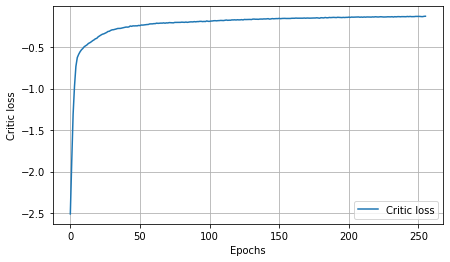

In [59]:
# Critic loss Graph Plot
plt.figure(figsize=(7,4))
plt.plot(wgan_gp.d_lossArray, label='Critic loss')
plt.xlabel('Epochs')
plt.ylabel('Critic loss')
plt.legend()
plt.grid()
plt.savefig('/content/drive/MyDrive/NSLKDD_Arpita/Downloaded_Files/critic_loss.png')
plt.show()

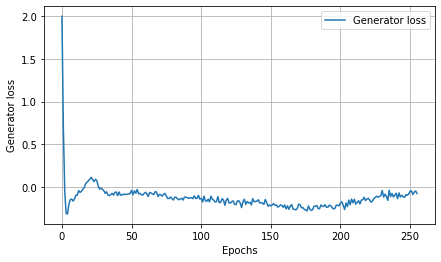

In [60]:
# Generator loss Graph Plot
plt.figure(figsize=(7,4))
plt.plot(wgan_gp.g_lossArray, label='Generator loss')
plt.xlabel('Epochs')
plt.ylabel('Generator loss')
plt.legend()
plt.grid()
plt.savefig('/content/drive/MyDrive/NSLKDD_Arpita/Downloaded_Files/generator_loss.png')
plt.show()

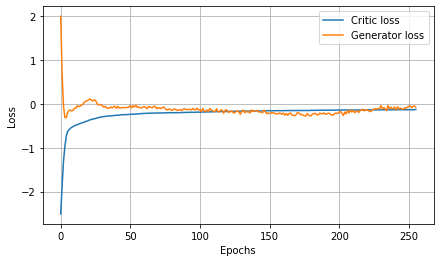

In [61]:
# Critic & Generator loss Graph Plot
plt.figure(figsize=(7,4))
plt.plot(wgan_gp.d_lossArray, label='Critic loss')
plt.plot(wgan_gp.g_lossArray, label='Generator loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid()
plt.savefig('/content/drive/MyDrive/NSLKDD_Arpita/Downloaded_Files/critic_&_generator_loss.png')
plt.show()

In [ ]:
Loading trained model
trained_generator = tf.keras.models.load_model('/content/generator.h5')

In [62]:
test_df.to_csv('/content/drive/MyDrive/NSLKDD_Arpita/Downloaded_Files/preprocessed_test_dataset.csv',index = False)

# Dataset Balancing

In [2]:
def BuildLabelMapping():
  labels.sort()
  label_mapping = {}
  for i in range(0,len(labels)):
    label_mapping[labels[i]] = i
  return label_mapping

In [3]:
label_mapping = BuildLabelMapping()

NameError: ignored

In [65]:
print(label_mapping)

{'dos': 0, 'normal': 1, 'probe': 2, 'r2l': 3, 'u2r': 4}


In [66]:
print(minor_class, major_class)

[['probe', 11656], ['r2l', 995], ['u2r', 52]] [['normal', 67343], ['dos', 45927]]


In [ ]:
major_class[-1][1]

In [67]:
def generate_sample(no_of_samples, attack_label):
    arr = np.zeros(shape=(no_of_samples,NUM_LABELS))
    idx = label_mapping.get(attack_label)
    if(idx != None):
      for row in arr:
        row[label_mapping[attack_label]] = 1
        
    noise = np.random.normal(size=(no_of_samples, Z_NOISE_DIM))
    noise_sample = np.concatenate((noise,arr),axis=1)
    generated_sample = model.predict(noise_sample)
    return generated_sample,arr

In [68]:
for minclass in minor_class:
    noOfSample = major_class[-1][1] - minclass[1]
    print(f"major_class : {major_class[-1][1]}")
    print(f"minclass : {minclass[1]}")
    print(f"noOfSample : {noOfSample}")
    print("*" * 50)  

major_class : 45927
minclass : 11656
noOfSample : 34271
**************************************************
major_class : 45927
minclass : 995
noOfSample : 44932
**************************************************
major_class : 45927
minclass : 52
noOfSample : 45875
**************************************************


In [69]:
def generateSamples2(pct):
  samples_generated = []
  for minclass in minor_class:
    noOfSample = major_class[-1][1] - minclass[1]
    noOfSample = int(noOfSample * pct) + 1
    print(f"major_class : {major_class[-1][1]}")
    print(f"minclass : {minclass[1]}")
    print(f"noOfSample : {noOfSample}")
    print("*" * 50)
    res,label = generate_sample(noOfSample,minclass[0])
    res = np.concatenate((res,label),axis=1)
    for row in res:
      samples_generated.append(row)
  return samples_generated


for pct in [0, 0.0001, 0.001, 0.01, .1, .2, .3, .4, .5, .6, .7, .8, .9, 1.0]:
    samples = generateSamples2(pct = pct)

    balanced_dataset = pd.DataFrame(data = samples,columns = df.columns)

    dataset = pd.concat([train_df,balanced_dataset])
    dataset.reset_index(inplace=True,drop=True)

    #Saving the dataframe
    dataset.to_csv(f'/content/drive/MyDrive/NSLKDD_Arpita/Downloaded_Files/Gan_generated_train_dataset/balanced_train_dataset_{str(pct)}.csv',index=False)
    


major_class : 45927
minclass : 11656
noOfSample : 1
**************************************************
1/1 [==============================] - 0s 103ms/step
major_class : 45927
minclass : 995
noOfSample : 1
**************************************************
1/1 [==============================] - 0s 12ms/step
major_class : 45927
minclass : 52
noOfSample : 1
**************************************************
1/1 [==============================] - 0s 13ms/step
major_class : 45927
minclass : 11656
noOfSample : 4
**************************************************
1/1 [==============================] - 0s 16ms/step
major_class : 45927
minclass : 995
noOfSample : 5
**************************************************
1/1 [==============================] - 0s 12ms/step
major_class : 45927
minclass : 52
noOfSample : 5
**************************************************
1/1 [==============================] - 0s 13ms/step
major_class : 45927
minclass : 11656
noOfSample : 35
**************************

In [71]:
pip install modin

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 970.3/970.3 KB 52.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.2/12.2 MB 74.5 MB/s eta 0:00:00
  Attempting uninstall: pandas
    Found existing installation: pandas 1.3.5
    Uninstalling pandas-1.3.5:
      Successfully uninstalled pandas-1.3.5


In [4]:
import numpy as np
import modin.pandas as pd
import sklearn
    
from xgboost import XGBClassifier

import xgboost as xgb


import numpy as np

from sklearn import metrics
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score

import seaborn as sns
import matplotlib.pyplot as plt

def LabelAttack(Y):
  attack = []
  for i in range(Y.shape[0]):
    k = 0
    for j in range(Y.shape[1]):
      if(Y[i][j] == 1):
        k = j
        break
    attack.append(k)
  return attack


def get_train_test_data(pct):
    test_df = pd.read_csv('/content/drive/MyDrive/NSLKDD_Arpita/Downloaded_Files/preprocessed_test_dataset.csv')                 #.sample(1024)
    train_df = pd.read_csv(f'/content/drive/MyDrive/NSLKDD_Arpita/Downloaded_Files/Gan_generated_train_dataset/balanced_train_dataset_{str(pct)}.csv')      #.sample(1024)
    
    print(train_df.shape, test_df.shape)

    label = ['dos', 'normal', 'probe', 'r2l', 'u2r']
   # label = ['Analysis','Backdoor','DoS','Exploits','Fuzzers','Generic','Normal','Reconnaissance','Shellcode','Worms']

    X_train = train_df.iloc[:,:train_df.shape[1]-5]
    Y_train = train_df.iloc[:,-5:].to_numpy()

    X_test = test_df.iloc[:,:test_df.shape[1]-5]
    Y_test = test_df.iloc[:,-5:].to_numpy()
   

    Y_train = np.asarray(LabelAttack(Y_train)).reshape(-1,1)
    Y_test = np.asarray(LabelAttack(Y_test)).reshape(-1,1)


    return X_train, Y_train, X_test, Y_test



def DirectMetrics(actual, predicted):
    
    cr = classification_report(actual, predicted)           
    print("Classification_Report : ")
    print(cr)
  
    Accuracy = accuracy_score(actual, predicted)
    print("Accuracy: %.2f%%" % (Accuracy * 100.0))
    
    Precision = precision_score(actual, predicted, average = 'weighted')
    Recall = recall_score(actual, predicted, average = 'weighted')
    F1_Score = f1_score(actual, predicted, average = 'weighted')
    
    return {"Direct_Precision" : Precision,
           "Direct_Recall" : Recall,
           "Direct_F1-Score" : F1_Score}


def ComputeMetrics(actual , predicted):
    TP, TN, FP, FN = 0, 0, 0, 0
    
    cm = confusion_matrix(actual, predicted)

    
    FP = cm.sum(axis = 0) - np.diag(cm)
    FN = cm.sum(axis = 1) - np.diag(cm)
    TP = np.diag(cm)
    TN = cm.sum() - (FP + FN + TP)

    FP = FP.astype(float)
    FN = FN.astype(float)
    TP = TP.astype(float)
    TN = TN.astype(float)

    sensitivity = TP/(TP+FN)
    avg_sensitivity = sum(sensitivity)/len(sensitivity)

    specificity = TN/(TN+FP)
    avg_specificity = sum(specificity)/len(specificity)

    precision = TP/(TP+FP)
    avg_precision = sum(precision)/len(precision)
    
    recall = TP/(TP+FN)
    avg_recall = sum(recall)/len(recall)
    
    f1_score = (2*recall*precision)/(recall + precision)
    avg_f1_score = sum(f1_score)/len(f1_score)
    
    FAR = FP/(FP+TN)
    avg_FAR = sum(FAR)/len(FAR)
    
    return {"Sensitivity " : avg_sensitivity,
           "Specificity " : avg_specificity,
           "Precision " : avg_precision,
           "Recall " : avg_recall,
           "F1_Score " : avg_f1_score,
           "FAR" : avg_FAR}          

xgb_params = {
    "booster": "dart",
    "verbosity": 0,
    "objective": "multi:softmax",
    "num_class" : 10,
    "lambda": 1.234568712743763e-06,
    "alpha": 0.021824183515918392,
    "subsample": 0.7966629501270384,
    "colsample_bytree": 0.8575214799710436,
    "early_stopping_rounds": 24,
    "n_estimators": 32,    
    "max_depth": 7,
    "min_child_weight": 5,
    "eta": 0.020721025441133932,
    "gamma": 8.632145831151602e-05,
    "grow_policy": "depthwise",
    "sample_type": "uniform",
    "normalize_type": "forest",
    "rate_drop": 1.4263688272813651e-08,
    "skip_drop": 3.191224113185437e-05,
    #"n_jobs" : -1
}

    
def train_models(X_train_df, Y_train_df, X_test_df, Y_test_df):

    _dict = { model_type : {"direct_metrics" : None, "metrics" : None} for model_type in ["xgb"]}  


    #----------------xgb model-------------------#
    dtrain = xgb.DMatrix(X_train_df, label=Y_train_df)
    dvalid = xgb.DMatrix(X_test_df, label=Y_test_df)  

    model = xgb.train(xgb_params, dtrain)
    preds = model.predict(dvalid)
    predictions_xgb = np.rint(preds)
    acc = sklearn.metrics.accuracy_score(Y_test_df, predictions_xgb)

    direct_metrics_xgb = DirectMetrics(Y_test_df, predictions_xgb)
    metrics_xgb = ComputeMetrics(Y_test_df, predictions_xgb)

    
    _dict["xgb"]["direct_metrics"] = direct_metrics_xgb
    _dict["xgb"]["metrics"] = metrics_xgb
    

    print("*" * 50)
    print("*" * 50)
    print(_dict)
    print("*" * 50)  

In [5]:
for pct in [0, 0.0001, 0.001, 0.01, .1, .2, .3, .4, .5, .6, .7, .8, .9, 1.0]:
    print(f"testing for {pct}")
    print("*" * 50)
    X_train_df, Y_train_df, X_test_df, Y_test_df = get_train_test_data(pct)
    train_models(X_train_df, Y_train_df, X_test_df, Y_test_df)
    print("_" * 50) 
    print("*" * 50)

testing for 0
**************************************************


To remove this warning, run the following python code before doing dataframe operations:

    from distributed import Client

    client = Client()



(125976, 47) (22543, 47)
Classification_Report : 
              precision    recall  f1-score   support

           0       0.96      0.77      0.85      7458
           1       0.67      0.97      0.79      9710
           2       0.68      0.62      0.65      2421
           3       0.97      0.14      0.25      2754
           4       0.70      0.13      0.22       200

    accuracy                           0.75     22543
   macro avg       0.80      0.52      0.55     22543
weighted avg       0.81      0.75      0.72     22543

Accuracy: 75.45%
**************************************************
**************************************************
{'xgb': {'direct_metrics': {'Direct_Precision': 0.8050444396396621, 'Direct_Recall': 0.7544692365701104, 'Direct_F1-Score': 0.724990842271438}, 'metrics': {'Sensitivity ': 0.5240946560435258, 'Specificity ': 0.9184425586674172, 'Precision ': 0.7970257443426221, 'Recall ': 0.5240946560435258, 'F1_Score ': 0.5512523199201207, 'FAR': 0.0815574

In [ ]:
###############################################################################################################################################